<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Generating-synthetic-data" data-toc-modified-id="Generating-synthetic-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generating synthetic data</a></span></li><li><span><a href="#From-Scratch" data-toc-modified-id="From-Scratch-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>From Scratch</a></span><ul class="toc-item"><li><span><a href="#Sigmoid-function" data-toc-modified-id="Sigmoid-function-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Sigmoid function</a></span></li><li><span><a href="#Log-likelihood-function" data-toc-modified-id="Log-likelihood-function-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Log-likelihood function</a></span></li><li><span><a href="#Gradient-&amp;-Regression" data-toc-modified-id="Gradient-&amp;-Regression-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Gradient &amp; Regression</a></span></li><li><span><a href="#Run-the-model" data-toc-modified-id="Run-the-model-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Run the model</a></span></li></ul></li><li><span><a href="#vs.-SkLearn" data-toc-modified-id="vs.-SkLearn-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>vs. SkLearn</a></span></li><li><span><a href="#Comparing-Accuracies" data-toc-modified-id="Comparing-Accuracies-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Comparing Accuracies</a></span></li></ul></li><li><span><a href="#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Support Vector Machines</a></span><ul class="toc-item"><li><span><a href="#Inspect-the-data" data-toc-modified-id="Inspect-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Inspect the data</a></span></li><li><span><a href="#Select-features-and-labels" data-toc-modified-id="Select-features-and-labels-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Select features and labels</a></span></li><li><span><a href="#Split-data-into-training-and-testing-sets" data-toc-modified-id="Split-data-into-training-and-testing-sets-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Split data into training and testing sets</a></span></li><li><span><a href="#Fit-the-data" data-toc-modified-id="Fit-the-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Fit the data</a></span></li><li><span><a href="#Accuracies" data-toc-modified-id="Accuracies-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Accuracies</a></span></li></ul></li><li><span><a href="#K-Nearest-Neighbors" data-toc-modified-id="K-Nearest-Neighbors-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>K-Nearest Neighbors</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#K-Means-Clustering" data-toc-modified-id="K-Means-Clustering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>K-Means Clustering</a></span></li><li><span><a href="#PCA---Principal-Component-Analysis" data-toc-modified-id="PCA---Principal-Component-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>PCA - Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#Encoding-the-classes" data-toc-modified-id="Encoding-the-classes-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Encoding the classes</a></span></li><li><span><a href="#Scaling-the-data" data-toc-modified-id="Scaling-the-data-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Scaling the data</a></span></li><li><span><a href="#Using-SKLearn's-PCA" data-toc-modified-id="Using-SKLearn's-PCA-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Using SKLearn's PCA</a></span></li><li><span><a href="#Preparing-the-transformed-data" data-toc-modified-id="Preparing-the-transformed-data-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Preparing the transformed data</a></span></li><li><span><a href="#Visualizing-the-projection" data-toc-modified-id="Visualizing-the-projection-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Visualizing the projection</a></span></li><li><span><a href="#Explained-Variance" data-toc-modified-id="Explained-Variance-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Explained Variance</a></span></li></ul></li></ul></div>

# Logistic Regression

In [31]:
from jupyterthemes import jtplot
jtplot.style()

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## Generating synthetic data

In [151]:
np.random.seed(42)  # random seed for repeatability
n_instances = 5000  # how many instances

x1 = np.random.multivariate_normal([0, 0], [[1, 0.25],[0.25, 1]], n_instances)
x2 = np.random.multivariate_normal([3, 3], [[1, 0.25],[0.25, 1]], n_instances)

synthetic_features = np.vstack((x1, x2)).astype(np.float32)
synthetic_labels   = np.hstack((np.zeros(n_instances), np.ones(n_instances)))

In [154]:
#help(np.random.multivariate_normal)

<IPython.core.display.Javascript object>


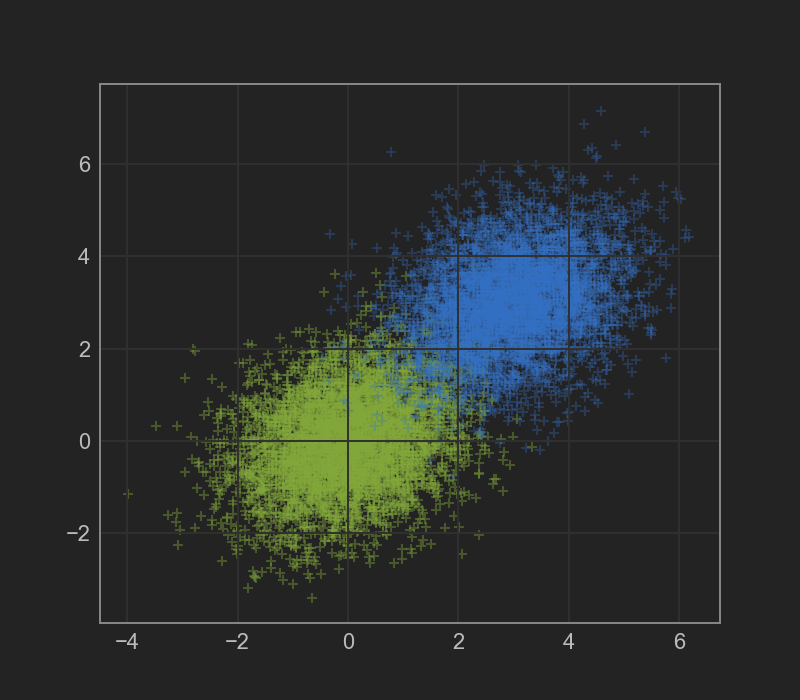

In [152]:
plt.scatter(x1[:,0], x1[:,1], alpha=0.4, c='g', marker='+')
plt.scatter(x2[:,0], x2[:,1], alpha=0.3, c='b', marker='+')

## From Scratch

### Sigmoid function

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [155]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

### Log-likelihood function

$$ L^{log} = \sum_{i=1}^{N}y_{i}\beta ^{T}x_{i} - log(1+e^{\beta^{T}x_{i}}) $$

In [156]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    logL = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return logL

### Gradient & Regression

$$ \bigtriangledown L^{log} = X^{T}(Y - Predictions) $$

In [157]:
grad_ = lambda X, Y, preds: np.dot(X.T, Y-preds)

In [162]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        gradient = grad_(features, target, predictions)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

### Run the model

In [167]:
weights = logistic_regression(synthetic_features, synthetic_labels,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-4274.265889560436
-795.2424536307747
-795.2424513913602
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136
-795.24245139136


## vs. SkLearn

In [169]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(synthetic_features, synthetic_labels)

print(clf.intercept_, clf.coef_)
print(weights)

[-7.06502849] [[2.41419304 2.31520744]]
[-7.0691384   2.41560378  2.31651304]


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Comparing Accuracies

In [170]:
data_with_intercept = np.hstack((np.ones((synthetic_features.shape[0], 1)),
                                 synthetic_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy from scratch: {0}'.format((preds == synthetic_labels).sum().astype(float) / len(preds)))
print('Accuracy from sk-learn: {0}'.format(clf.score(synthetic_features, synthetic_labels)))

Accuracy from scratch: 0.9693
Accuracy from sk-learn: 0.9693


# Support Vector Machines

In [45]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

support_model = svm.SVC(gamma='scale')
data = pd.read_csv('data/iris.csv')

In [123]:
help(svm.SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 | 

## Inspect the data

In [16]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
40,5.0,3.5,1.3,0.3,setosa
78,6.0,2.9,4.5,1.5,versicolor
65,6.7,3.1,4.4,1.4,versicolor
133,6.3,2.8,5.1,1.5,virginica
144,6.7,3.3,5.7,2.5,virginica


In [17]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Select features and labels

In [60]:
# suppose we're only interested in petal_length and petal_width
features = data.values[:, 2:4]
labels = data.values[:, 4]

In [61]:
encode_key = [i for i in enumerate(np.unique(labels))]
encoded_labels = []

In [62]:
for i in labels:
    for j in encode_key:
        if i == j[1]: encoded_labels.append(j[0])
encoded_labels = np.asarray(encoded_labels)

In [22]:
features[0:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]], dtype=object)

In [21]:
labels[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [63]:
encoded_labels[0:5]

array([0, 0, 0, 0, 0])

## Split data into training and testing sets

In [23]:
trainX, testX, trainY, testY = train_test_split(features, labels, test_size = .33)

## Fit the data

In [29]:
support_model.fit(trainX, trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
predictions = support_model.predict(testX)

## Accuracies

In [35]:
print("Training set accuracy: {}".format(support_model.score(trainX, trainY)))

Training set accuracy: 0.97


<IPython.core.display.Javascript object>


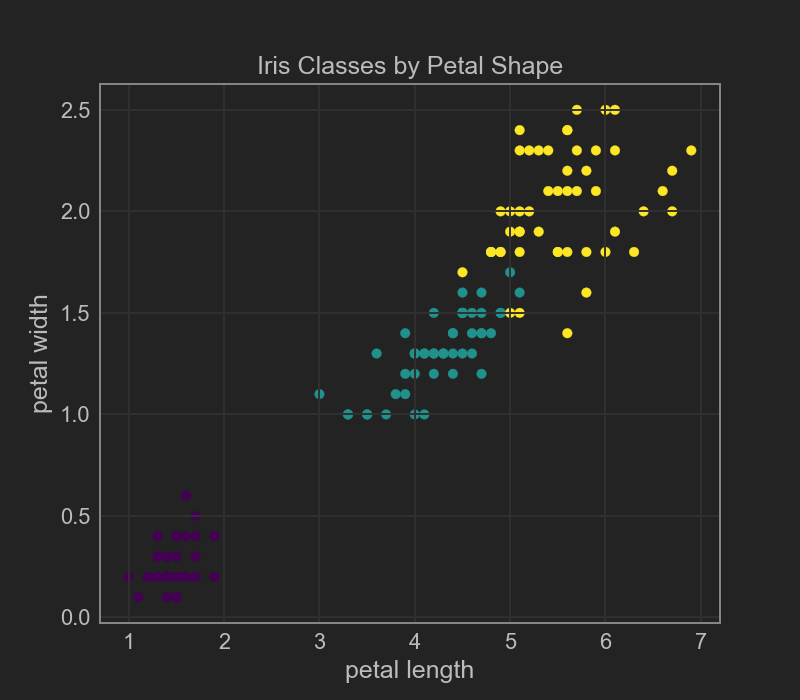

In [91]:
fig, ax = plt.subplots()

ax.set_ylabel('petal width')
ax.set_xlabel('petal length')
ax.set_title("Iris Classes by Petal Shape")

ax.scatter(features[:,0], 
           features[:,1], 
           c=encoded_labels,)

# K-Nearest Neighbors

KNN optimizes a (usually) Euclidian distance function, classifying instances based on distance from nearest points and the classifications of those nearest points.

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [97]:
data = pd.read_csv('data/iris.csv')

features = data.values[:, 2:4]
labels = data.values[:, 4]

trainX, testX, trainY, testY = train_test_split(features, labels, test_size = .33)

In [121]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of th

In [100]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainX, trainY)
print('Training accuracy score: \n', knn.score(testX, testY))
pred = knn.predict(testX)

Training accuracy score: 
 0.96


# Random Forest

Random Forest is an ensemble technique, meaning that it creates an ensemble of weak learners that work together to create a strong model. The partiuclar weak learners in a Random Forest model are decision trees. Random decision trees made from samples of the data form the trees in the forest.

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [104]:
data = pd.read_csv('data/iris.csv')

features = data.values[:, 2:4]
labels = data.values[:, 4]

trainX, testX, trainY, testY = train_test_split(features, labels, test_size = .33)

In [112]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble.forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators='warn', criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators

In [119]:
RFC = RandomForestClassifier(n_estimators=100, criterion="gini")
RFC.fit(trainX, trainY)
print('Training accuracy: \n', RFC.score(testX, testY))
pred = RFC.predict(testX)

Training accuracy: 
 0.94


# K-Means Clustering

"K" refers to the number of specified clusters. The algorithm begins by selecting instances randomly and optimizing groupings by optimizing a distance formula.

The research must specify the correct value of "K".

In [124]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('data/iris.csv')

features = data.values[:, 2:4]
labels = data.values[:, 4]

trainX, testX, trainY, testY = train_test_split(features, labels, test_size = .33)

In [125]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centro

In [127]:
KMC = KMeans(n_clusters=3) # 3 clusters because we have 3 classes of iris
KMC.fit(features)
data['Pred'] = KMC.predict(features)

In [128]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Pred
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [129]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,Pred
15,5.7,4.4,1.5,0.4,setosa,0
86,6.7,3.1,4.7,1.5,versicolor,2
46,5.1,3.8,1.6,0.2,setosa,0
105,7.6,3.0,6.6,2.1,virginica,1
121,5.6,2.8,4.9,2.0,virginica,1


<IPython.core.display.Javascript object>


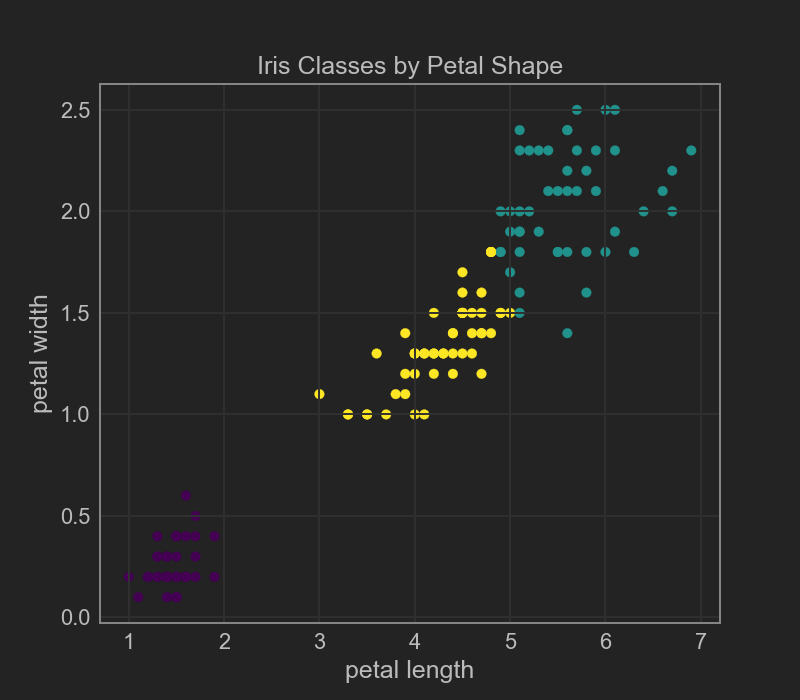

In [130]:
fig, ax = plt.subplots()

ax.set_ylabel('petal width')
ax.set_xlabel('petal length')
ax.set_title("Iris Classes by Petal Shape")

ax.scatter(data['petal_length'], 
           data['petal_width'], 
           c=data['Pred'])

# PCA - Principal Component Analysis

PCA is an algorithm for reducing dimensionality. As the name suggests, it decomposes data into its principal components using linear algebra. It does this by finding vector directions of maximum statistical variance, then projects the data onto those vector directions (which are in fact the dimensions that maximize statistical variance) therefore reducing the dimension. 

A very basic, over-simplified example would be a randomly distributed 2-dimensional data set that can be fitted with a linear regression. It just so happens that the line of the linear regression would be the dimension into which the data is projected, reducing it from 2-dimensions to one diension with maximized variance. (see more <a href="https://www.youtube.com/watch?v=kw9R0nD69OU&feature=youtu.be">here on youtube</a>)

These techniques can drastically reduce the computational requirements for implementing a model on complex data (with many features).

PCA is unsupervised but a researcher using PCA should still keep close watch of the algorithm to ensure that it does not significantly augment the behavior/meaning of the data.

__Note:__ PCA is directly affected by the scale of the data. Standardize and scale the data before applying PCA.

In [171]:
from sklearn import decomposition as decomp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [177]:
#help(decomp)
#help(decomp.PCA)
#help(decomp.FactorAnalysis)
#help(StandardScaler)
#help(PCA.fit_transform)
#help(PCA.transform)

In [179]:
data = pd.read_csv('data/iris.csv')

features = data.values[:, 0:4]
labels = data.values[:, 4]

## Encoding the classes

In [ ]:
encode_key = [i for i in enumerate(np.unique(labels))]
encoded_labels = []

for i in labels:
    for j in encode_key:
        if i == j[1]: encoded_labels.append(j[0])
encoded_labels = np.asarray(encoded_labels)

## Scaling the data

In [181]:
features = StandardScaler().fit_transform(features)

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Using SKLearn's PCA

In [184]:
PCA = decomp.PCA(n_components=2)

principal_components = PCA.fit_transform(features)

## Preparing the transformed data

In [204]:
PCA_df = pd.DataFrame(data = principal_components,
                      columns = ['component1', 'component2'])

PCA_df = pd.concat([PCA_df, 
                    pd.DataFrame(data=np.asarray([encoded_labels, labels]).T, 
                                         columns=['target', 'label'])],
                    axis=1)
PCA_df.sample(10)

,component1,component2,target,label
61,0.438730,-0.058881,1,versicolor
122,2.898064,0.397791,2,virginica
1,-2.086426,-0.655405,0,setosa
73,0.629381,-0.416812,1,versicolor
3,-2.304197,-0.575368,0,setosa
108,2.001735,-0.723865,2,virginica
149,0.959299,-0.022284,2,virginica
116,1.471280,0.253192,2,virginica
55,0.384458,-0.591062,1,versicolor
11,-2.327378,0.158587,0,setosa


## Visualizing the projection

<IPython.core.display.Javascript object>


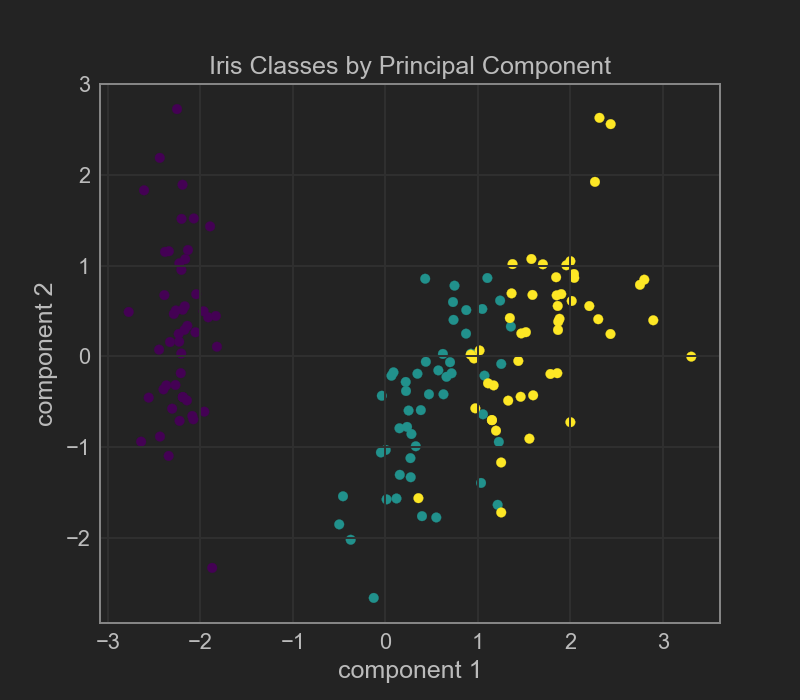

In [206]:
fig, ax = plt.subplots()

ax.set_ylabel('component 2')
ax.set_xlabel('component 1')
ax.set_title("Iris Classes by Principal Component")

ax.scatter(PCA_df['component1'], 
           PCA_df['component2'], 
           c=PCA_df['target'])

## Explained Variance

The explained variance tells you how much *information* (how much variance!) each principal component contributes.

In this way, we can can actually discover which components are useful and worth keeping!

By using the feature `explained_variance_ratio`, you can check how much information you retain after performing the analysis:

In [208]:
evr = PCA.explained_variance_ratio_
display(evr, sum(evr))

array([0.72770452, 0.23030523])

0.9580097536148199

We managed to keep over 95% of the information.